# Diabetes Prediction

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

In [5]:
# Read the CSV file into a DataFrame
df = pd.read_csv("diabetes.csv")

# Rename the DataFrame to a new name
new_name = "new_ds"
df.rename(columns=lambda x: x.replace("Outcome", new_name), inplace=True)

In [6]:
diabetes = pd.read_csv("diabetes.csv")

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Show the row and column numbers
row_count, column_count = df.shape
print("Number of rows:", row_count)
print("Number of columns:", column_count)


Number of rows: 768
Number of columns: 9


In [8]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   new_ds                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
new_ds,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [16]:
#see if there is any null values of for any columns
null_values = df.isnull().sum()
print("\nNull values in each column:")
print(null_values)


Null values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
new_ds                      0
dtype: int64


C:\Users\gokul\AppData\Local\Temp\ipykernel_20036\1840251571.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = df.hist(ax=ax)


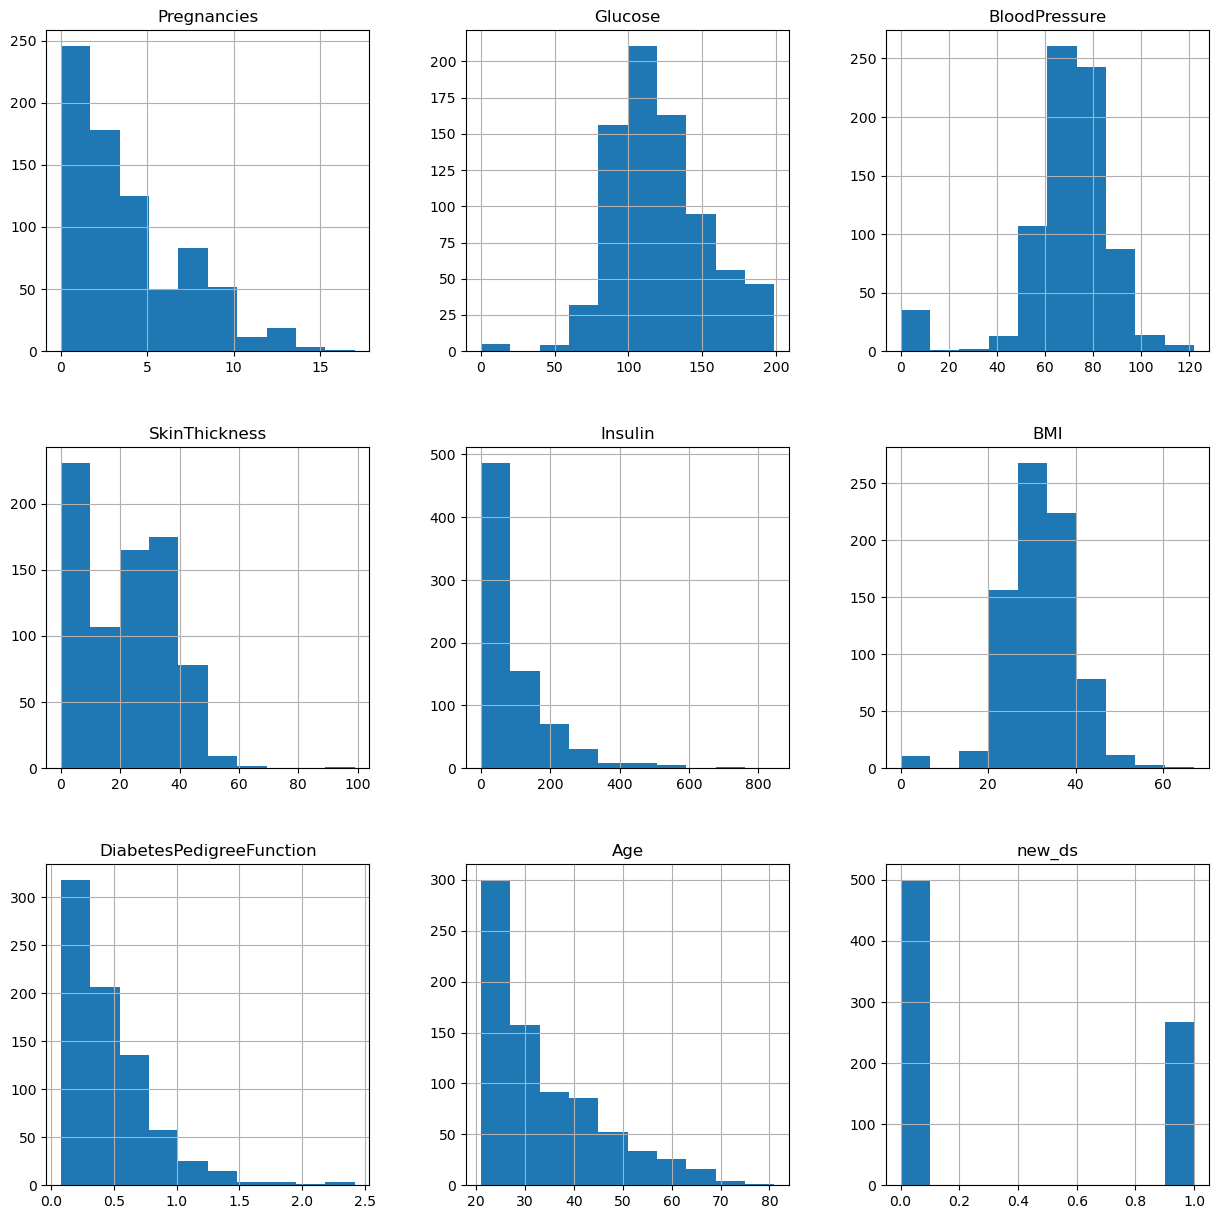

In [18]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

In [19]:
from sklearn.preprocessing import MinMaxScaler
list_of_features = ["Pregnancies", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]
scaler = MinMaxScaler()
df[list_of_features] = scaler.fit_transform(df[list_of_features])

In [20]:
no, yes = diabetes["Outcome"].value_counts()

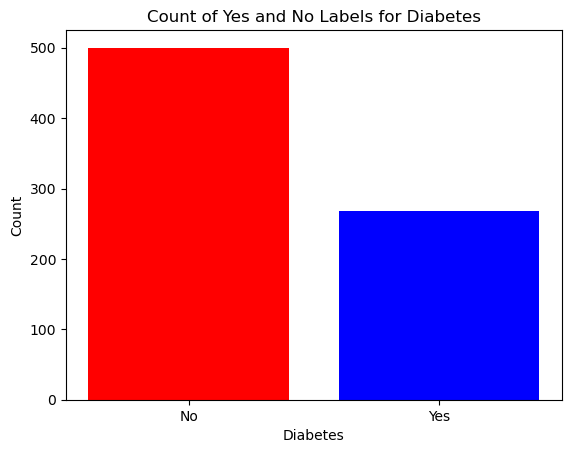

In [21]:
plt.bar(['No', 'Yes'], [no, yes], color=['red', 'blue'])
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Count of Yes and No Labels for Diabetes')
plt.show()

In [22]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'new_ds'],
      dtype='object')


In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['new_ds'])  # Assuming 'target_column' is the name of your target variable
y = df['new_ds']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

In [26]:
log_reg_model = LogisticRegression(solver='newton-cg', max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict using the trained model
y_pred = log_reg_model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       125
           1       0.65      0.48      0.55        67

    accuracy                           0.73       192
   macro avg       0.70      0.67      0.68       192
weighted avg       0.72      0.73      0.72       192



In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7291666666666666


In [38]:
# Compute precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.6530612244897959


In [40]:
# Compute recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.47761194029850745


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

# Generate classification report
report_knn = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report_knn)

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79       125
           1       0.60      0.36      0.45        67

    accuracy                           0.69       192
   macro avg       0.66      0.62      0.62       192
weighted avg       0.68      0.69      0.67       192



In [46]:
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn)

Accuracy: 0.6927083333333334


In [48]:
precision_knn = precision_score(y_test, y_pred)
print("Precision:", precision_knn)

Precision: 0.6


In [50]:
recall_knn = recall_score(y_test, y_pred)
print("Recall:", recall_knn)

Recall: 0.3582089552238806


In [52]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [54]:
from sklearn.metrics import classification_report

# Generate classification report
report_svm_classifier = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report_svm_classifier)

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       125
           1       0.65      0.46      0.54        67

    accuracy                           0.72       192
   macro avg       0.70      0.66      0.67       192
weighted avg       0.71      0.72      0.71       192



In [56]:
accuracy_svm_classifier = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svm_classifier)

Accuracy: 0.7239583333333334


In [58]:
precision_svm_classifier = precision_score(y_test, y_pred)
print("Precision:", precision_svm_classifier)

Precision: 0.6458333333333334


In [60]:
recall_svm_classifier = recall_score(y_test, y_pred)
print("Recall:", recall_svm_classifier)

Recall: 0.4626865671641791


In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [66]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.75


In [68]:
precision_rf = precision_score(y_test, y_pred_rf)
print("Precision:", precision_rf)

Precision: 0.6727272727272727


In [70]:
recall_rf = recall_score(y_test, y_pred_rf)
print("Recall:", recall_rf)

Recall: 0.5522388059701493


# Comparing models
## Comparing accuracy, precision and recall scores of Logistic Regression, SVM and KNN.

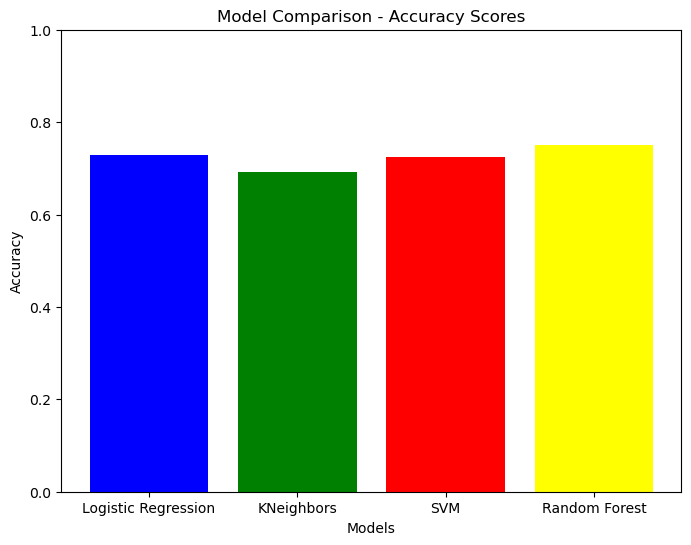

In [76]:
model_names = ['Logistic Regression','KNeighbors', 'SVM','Random Forest']
accuracy_scores = [accuracy,accuracy_knn,accuracy_svm_classifier,accuracy_rf]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green','red','yellow'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy Scores")
plt.ylim(0, 1.0)
plt.show()

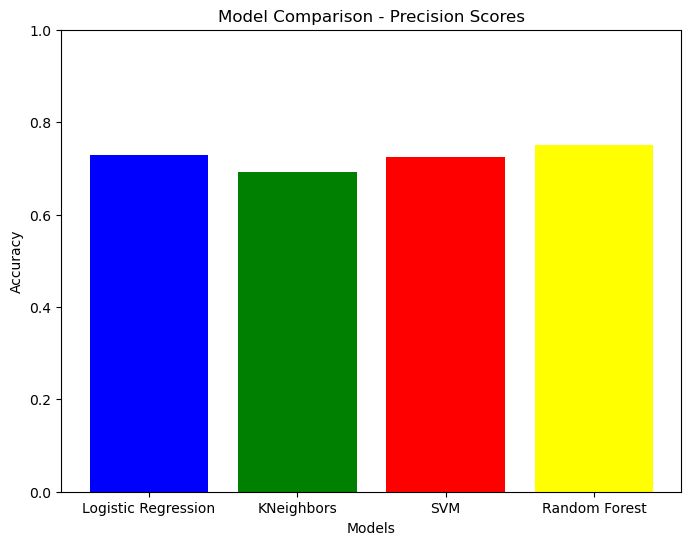

In [80]:
model_names = ['Logistic Regression','KNeighbors', 'SVM','Random Forest']
precision_scores = [precision,precision_knn,precision_svm_classifier, precision_rf]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green','red','yellow'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Precision Scores")
plt.ylim(0, 1.0)
plt.show()

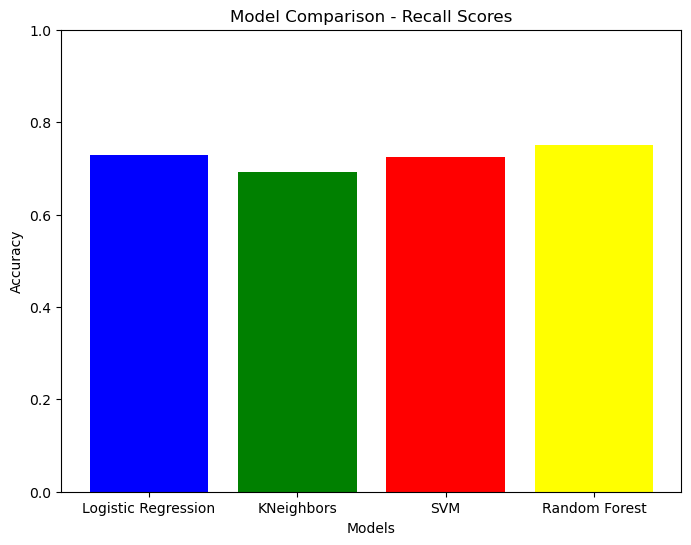

In [82]:
model_names = ['Logistic Regression','KNeighbors', 'SVM','Random Forest']
recall_scores = [recall,recall_knn,recall_svm_classifier,recall_rf]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green','red','yellow'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Recall Scores")
plt.ylim(0, 1.0)
plt.show()